<a href="https://colab.research.google.com/github/Satyamaadi/python/blob/master/Experimenting__with_advanced_optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data,train_label),(test_data,test_label) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
train_data,test_data = train_data/255.0,test_data/255.0

In [4]:
train_data = train_data.reshape(train_data.shape[0],*(28,28,1))
test_data = test_data.reshape(test_data.shape[0],*(28,28,1))

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [6]:
def lenet(name='lenet'):
  model = Sequential(name=name)
  model.add(Conv2D(6,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(16,kernel_size=(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(120,activation='relu'))
  model.add(Dense(84,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  return model

In [7]:
from tensorflow.keras import optimizers

In [8]:
log_begin_red, log_begin_blue, log_begin_green = '\033[91m', '\n\033[94m', '\033[92m'
log_begin_bold, log_begin_underline = '\033[1m', '\033[4m'
log_end_format = '\033[0m'


In [9]:
optimizers_examples = {
    'sgd': optimizers.SGD(),
    'momentum': optimizers.SGD(momentum=0.9),
    'nag': optimizers.SGD(momentum=0.9, nesterov=True),
    'adagrad': optimizers.Adagrad(),
    'adadelta': optimizers.Adadelta(),
    'rmsprop': optimizers.RMSprop(),
    'adam': optimizers.Adam()
}

In [10]:
history_per_optimizer = dict()

print("Experiment: {0}start{1} (training logs = off)".format(log_begin_red, log_end_format))
for optimizer_name in optimizers_examples:
    # Resetting the seeds (for random number generation), to reduce the impact of randomness on the comparison:
    tf.random.set_seed(42)
    np.random.seed(42)
    # Creating the model:
    model = lenet("lenet_{}".format(optimizer_name))
    optimizer = optimizers_examples[optimizer_name]
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Launching the training (we set `verbose=0`, so the training won't generate any logs):
    print("\t> Training with {0}: {1}start{2}".format(
        optimizer_name, log_begin_red, log_end_format))
    history = model.fit(train_data, train_label,
                        batch_size=32, epochs=20, validation_data=(test_data, test_label),
                        verbose=0)
    history_per_optimizer[optimizer_name] = history
    print('\t> Training with {0}: {1}done{2}.'.format(
        optimizer_name, log_begin_green, log_end_format))
print("Experiment: {0}done{1}".format(log_begin_green, log_end_format))

Experiment: start (training logs = off)
	> Training with sgd: start
	> Training with sgd: done.
	> Training with momentum: start
	> Training with momentum: done.
	> Training with nag: start
	> Training with nag: done.
	> Training with adagrad: start
	> Training with adagrad: done.
	> Training with adadelta: start
	> Training with adadelta: done.
	> Training with rmsprop: start
	> Training with rmsprop: done.
	> Training with adam: start
	> Training with adam: done.
Experiment: done


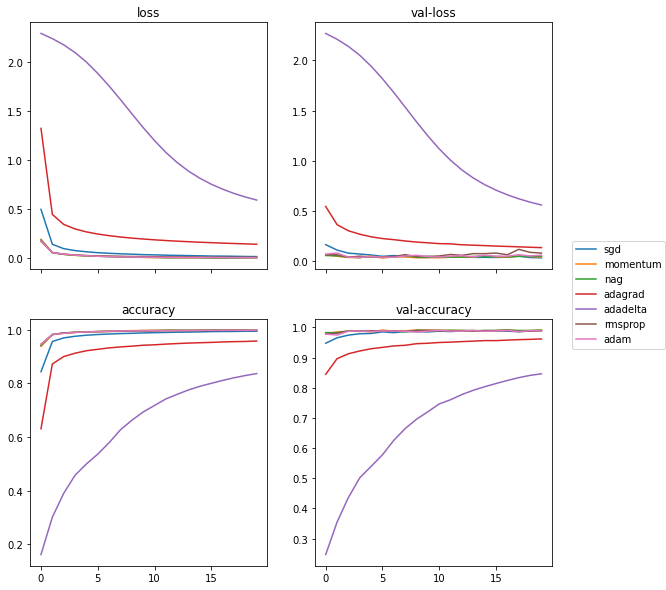

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex='col')
ax[0, 0].set_title("loss")
ax[0, 1].set_title("val-loss")
ax[1, 0].set_title("accuracy")
ax[1, 1].set_title("val-accuracy")

lines, labels = [], []
for optimizer_name in history_per_optimizer:
    history = history_per_optimizer[optimizer_name]
    ax[0, 0].plot(history.history['loss'])
    ax[0, 1].plot(history.history['val_loss'])
    ax[1, 0].plot(history.history['accuracy'])
    line = ax[1, 1].plot(history.history['val_accuracy'])
    lines.append(line[0])
    labels.append(optimizer_name)

fig.legend(lines,labels, loc='center right', borderaxespad=0.1)
plt.subplots_adjust(right=0.85)